## Exploratory analysis of the third iteration of our manually annotated dataset

Download dataset (V3) csv file

In [1]:
# check metadata csv file (dataset-v3.csv) is in google drive

# mount google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# peek contents of dataset-v3.csv
!head /content/drive/MyDrive/team_challenge/dataset-v3.csv

Mounted at /content/drive
"annotation_id","annotator","choice","created_at","id","image","lead_time","updated_at"
313,"4","Grass","2024-07-11T10:12:24.449200Z",18194,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_194_388.jpg",4.744,"2024-07-11T10:12:24.449230Z"
346,"4","{""choices"":[""Grass"",""Artifact""]}","2024-07-11T10:14:02.288312Z",18212,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_2419_388.jpg",16.121,"2024-07-11T10:14:02.288342Z"
363,"4","{""choices"":[""Grass"",""Soil""]}","2024-07-11T10:14:38.518648Z",18221,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_388_965.jpg",4.318,"2024-07-11T10:14:38.518677Z"
376,"4","{""choices"":[""Grass"",""Soil""]}","2024-07-11T10:15:08.588492Z",18226,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_582_776.jpg",3.141,"2024-07-11T10:15:08.588532Z"
385,"4","{""choices"":[""Grass"",""Soil""]}","2024-07-11T10:15:31.489451Z",18230,"/data/local-files/?d=content/conten

Generate dataframe

In [2]:
# Generate df and make image_name column

import pandas as pd

csv_path = "/content/drive/MyDrive/team_challenge/dataset-v3.csv"
main_df = pd.read_csv(csv_path)
main_df['image_name'] = main_df['image'].apply(lambda x: x.split('/')[-1].replace('%20', ' ')) # Ensure URL encoded spaces are replaced

main_df

,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at,image_name
0,313,4,Grass,2024-07-11T10:12:24.449200Z,18194,/data/local-files/?d=content/content/flat_spli...,4.744,2024-07-11T10:12:24.449230Z,Bare Soil_Fran_0_194_388.jpg
1,346,4,"{""choices"":[""Grass"",""Artifact""]}",2024-07-11T10:14:02.288312Z,18212,/data/local-files/?d=content/content/flat_spli...,16.121,2024-07-11T10:14:02.288342Z,Bare Soil_Fran_0_2419_388.jpg
2,363,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:14:38.518648Z,18221,/data/local-files/?d=content/content/flat_spli...,4.318,2024-07-11T10:14:38.518677Z,Bare Soil_Fran_0_388_965.jpg
3,376,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:15:08.588492Z,18226,/data/local-files/?d=content/content/flat_spli...,3.141,2024-07-11T10:15:08.588532Z,Bare Soil_Fran_0_582_776.jpg
4,385,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:15:31.489451Z,18230,/data/local-files/?d=content/content/flat_spli...,3.113,2024-07-11T10:15:31.489485Z,Bare Soil_Fran_0_776_388.jpg
...,...,...,...,...,...,...,...,...,...
14617,8313,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T12:19:27.506188Z,114568,/data/local-files/?d=content/content/flat_spli...,1.795,2024-07-17T12:19:27.506207Z,More Clover_9_0_1746.jpg
14618,8281,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T12:12:20.629833Z,114600,/data/local-files/?d=content/content/flat_spli...,9.405,2024-07-17T12:12:20.629851Z,More Clover_9_194_1552.jpg
14619,8268,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T12:09:18.940466Z,114613,/data/local-files/?d=content/content/flat_spli...,2.428,2024-07-17T12:09:18.940483Z,More Clover_9_388_1824.jpg
14620,8247,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T12:08:02.035190Z,114634,/data/local-files/?d=content/content/flat_spli...,2.586,2024-07-17T12:08:02.035208Z,More Clover_9_776_1746.jpg


In [3]:
# show class choices

all_choices = list(main_df['choice'].unique())
all_choices

['Grass',
 '{"choices":["Grass","Artifact"]}',
 '{"choices":["Grass","Soil"]}',
 '{"choices":["Grass","Soil","Artifact"]}',
 '{"choices":["Grass","Dung"]}',
 '{"choices":["Grass","Dung","Soil"]}',
 'Soil',
 '{"choices":["Soil","Artifact"]}',
 '{"choices":["Grass","Sheep Dung"]}',
 '{"choices":["Sheep Dung","Soil"]}',
 '{"choices":["Grass","Sheep Dung","Soil"]}',
 'Artifact',
 '{"choices":["Clover","Grass"]}',
 '{"choices":["Clover","Grass","Soil"]}',
 '{"choices":["Clover","Grass","Dung"]}',
 '{"choices":["Clover","Grass","Artifact"]}',
 'Dung',
 nan,
 'Clover',
 '{"choices":["Grass","Dung","Artifact"]}',
 '{"choices":["Clover","Grass","Sheep Dung"]}',
 '{"choices":["Clover","Soil"]}',
 '{"choices":["Clover","Artifact"]}',
 '{"choices":["Grass","Dung","Sheep Dung"]}',
 '{"choices":["Dung","Soil"]}',
 '{"choices":["Grass","Dung","Sheep Dung","Soil"]}',
 '{"choices":["Grass","Dung","Soil","Artifact"]}',
 'Sheep Dung',
 '{"choices":["Clover","Grass","Soil","Artifact"]}',
 '{"choices":["Cl

In [4]:
import json

def parse_json_choice(json_string):
  # Return the choices in form of a list e.g.:
  # input: '{"choices":["Grass","Soil"]}'
  # output: ["Grass","Soil"]
  json_data = json.loads(json_string)

  return json_data['choices']

Now to deconvolute the labels: rather than assign a single label to each image (as done in 240716_datasetV2_exploration.ipynb) - images with multiple labels will be handled in the model using one-hot encoding.

In [5]:
# Iterate through df rows assigning a single label to each image

df_labels = []
for index, row in main_df.iterrows():
  if type(row['choice']) != str:
    df_labels.append(None)
  elif '{"choices":' in row['choice']:

    label_list = parse_json_choice(row['choice']) # row choices a list e.g. ['Grass', 'Soil']
    df_labels.append(label_list)

  else:
    df_labels.append([row['choice']])


main_df['label'] = df_labels
main_df

,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at,image_name,label
0,313,4,Grass,2024-07-11T10:12:24.449200Z,18194,/data/local-files/?d=content/content/flat_spli...,4.744,2024-07-11T10:12:24.449230Z,Bare Soil_Fran_0_194_388.jpg,[Grass]
1,346,4,"{""choices"":[""Grass"",""Artifact""]}",2024-07-11T10:14:02.288312Z,18212,/data/local-files/?d=content/content/flat_spli...,16.121,2024-07-11T10:14:02.288342Z,Bare Soil_Fran_0_2419_388.jpg,"[Grass, Artifact]"
2,363,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:14:38.518648Z,18221,/data/local-files/?d=content/content/flat_spli...,4.318,2024-07-11T10:14:38.518677Z,Bare Soil_Fran_0_388_965.jpg,"[Grass, Soil]"
3,376,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:15:08.588492Z,18226,/data/local-files/?d=content/content/flat_spli...,3.141,2024-07-11T10:15:08.588532Z,Bare Soil_Fran_0_582_776.jpg,"[Grass, Soil]"
4,385,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:15:31.489451Z,18230,/data/local-files/?d=content/content/flat_spli...,3.113,2024-07-11T10:15:31.489485Z,Bare Soil_Fran_0_776_388.jpg,"[Grass, Soil]"
...,...,...,...,...,...,...,...,...,...,...
14617,8313,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T12:19:27.506188Z,114568,/data/local-files/?d=content/content/flat_spli...,1.795,2024-07-17T12:19:27.506207Z,More Clover_9_0_1746.jpg,"[Clover, Grass]"
14618,8281,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T12:12:20.629833Z,114600,/data/local-files/?d=content/content/flat_spli...,9.405,2024-07-17T12:12:20.629851Z,More Clover_9_194_1552.jpg,"[Clover, Grass]"
14619,8268,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T12:09:18.940466Z,114613,/data/local-files/?d=content/content/flat_spli...,2.428,2024-07-17T12:09:18.940483Z,More Clover_9_388_1824.jpg,"[Clover, Grass]"
14620,8247,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T12:08:02.035190Z,114634,/data/local-files/?d=content/content/flat_spli...,2.586,2024-07-17T12:08:02.035208Z,More Clover_9_776_1746.jpg,"[Clover, Grass]"


In [6]:
# Drop images with no labels
main_df_noNaN = main_df.dropna(subset=['label'])
print(f"{len(main_df) - len(main_df_noNaN)} images with no labels removed")

68 images with no labels removed


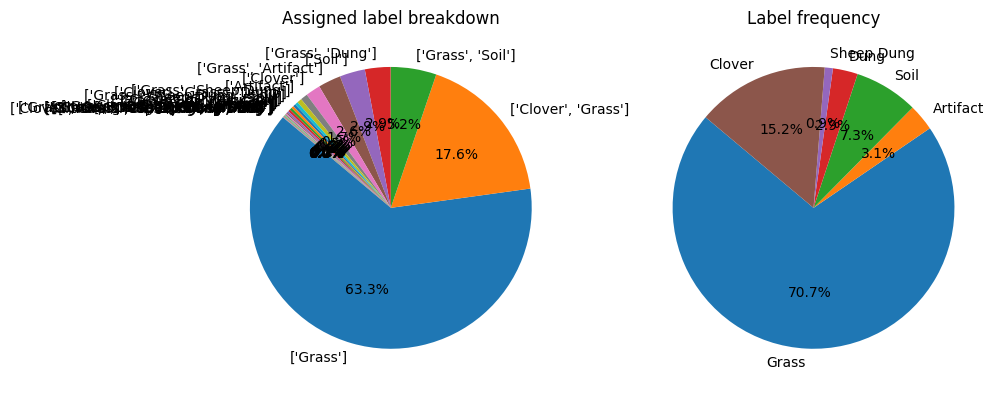

In [7]:
# view distribution of assigned labels & their frequency (i.e. total occurrances of each label)

import matplotlib.pyplot as plt
from collections import Counter

choice_counts = main_df['label'].value_counts()

flattened_label_list = [label for sublist in main_df_noNaN['label'] for label in sublist]
label_counts = Counter(flattened_label_list)

fig, axs = plt.subplots(1,2, figsize=(10, 10))

axs[0].pie(choice_counts, labels=choice_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title("Assigned label breakdown")

axs[1].pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title("Label frequency")

plt.show()

Very imbalanced dataset, will downsample Grass for future training.

In [8]:
# downsample grass (target = 50% grass)

from sklearn.utils import resample

df_grass_only = main_df_noNaN[main_df_noNaN['label'].apply(lambda x: x == ['Grass'])]
df_not_grass_only = main_df_noNaN[main_df_noNaN['label'].apply(lambda x: x != ['Grass'])]

target_grass_count = len(df_grass_only)//2 # half the number of grass only images

df_grass_downsampled = resample(df_grass_only,
                              replace=False,
                              n_samples=target_grass_count,
                              random_state=0)

print(f"Number of grass (only) images before/after = {len(df_grass_only)}/{len(df_grass_downsampled)}")

main_df_resampled = pd.concat([df_grass_downsampled, df_not_grass_only])

print(f"Size of dataset before/after downsampling = {len(main_df_noNaN)}/{len(main_df_resampled)}")

Number of grass (only) images before/after = 9213/4606
Size of dataset before/after downsampling = 14554/9947


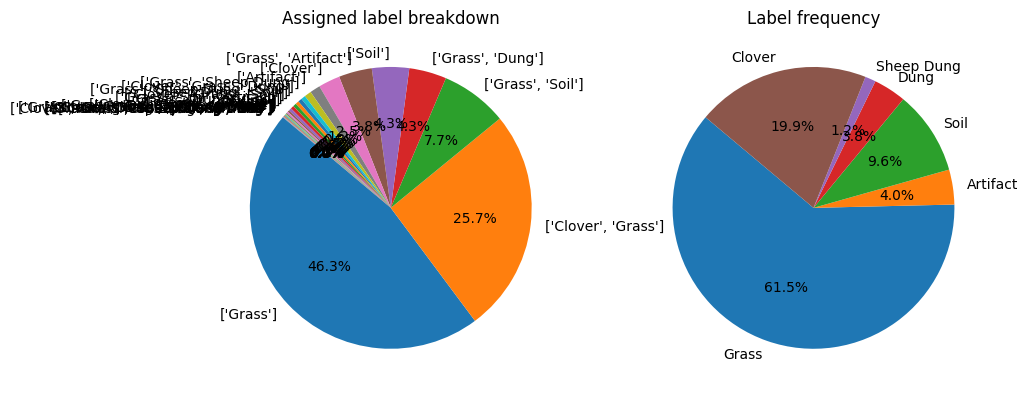

In [9]:
# View label counts after resampling

choice_counts = main_df_resampled['label'].value_counts()

flattened_label_list = [label for sublist in main_df_resampled['label'] for label in sublist]
label_counts = Counter(flattened_label_list)

fig, axs = plt.subplots(1,2, figsize=(10, 10))

axs[0].pie(choice_counts, labels=choice_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title("Assigned label breakdown")

axs[1].pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title("Label frequency")

plt.show()

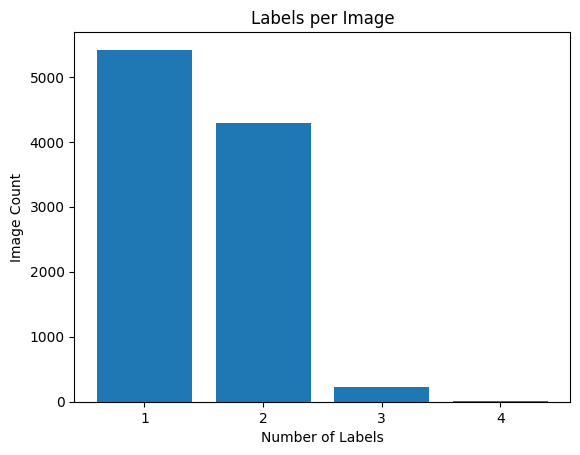

In [20]:
# Determine distribution of images with multiple labels

main_df_resampled['label_count'] = main_df_resampled['label'].apply(len)

label_count_freq = main_df_resampled['label_count'].value_counts().sort_index()

fig, ax = plt.subplots()
ax.bar(label_count_freq.index, label_count_freq.values)

ax.set_xlabel('Number of Labels')
ax.set_ylabel('Image Count')
ax.set_title('Labels per Image')

ax.set_xticks(label_count_freq.index)
ax.set_xticklabels(label_count_freq.index)

plt.show()

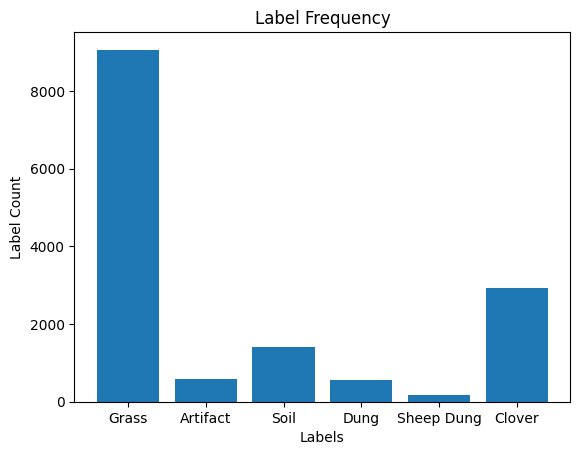

In [21]:
# Plot frequency of each of the possible labels

all_labels = [label for sublist in main_df_resampled['label'] for label in sublist]

label_freq = Counter(all_labels)

label_freq_df = pd.DataFrame.from_dict(label_freq, orient='index', columns=['Frequency'])

fig, ax = plt.subplots()
ax.bar(label_freq_df.index, label_freq_df['Frequency'])

ax.set_xlabel('Labels')
ax.set_ylabel('Label Count')
ax.set_title('Label Frequency')

plt.show()